In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download emirhanai/animal-computer-vision-clean-dataset-code-cnnai

Dataset URL: https://www.kaggle.com/datasets/emirhanai/animal-computer-vision-clean-dataset-code-cnnai
License(s): Attribution 4.0 International (CC BY 4.0)
100% 216M/217M [00:12<00:00, 23.4MB/s]
100% 217M/217M [00:12<00:00, 18.1MB/s]


In [5]:
import zipfile
import os

dataset_path = "animal-computer-vision-clean-dataset-code-cnnai.zip"
extract_path = "data"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", os.path.abspath(extract_path))



Dataset extracted to: /content/data


In [6]:
ls ## list of directory

animal-computer-vision-clean-dataset-code-cnnai.zip  data/  sample_data/


## change directory

In [8]:
cd /content/data/animal_computer_vision/Dataset

/content/data/animal_computer_vision/Dataset


In [9]:
ls

Buffalo/  Elephant/  Rhino/  Zebra/


In [10]:
import os
print(os.getcwd())
print(os.listdir())

/content/data/animal_computer_vision/Dataset
['Rhino', 'Buffalo', 'Zebra', 'Elephant']


In [11]:
import glob
import pandas as pd
import numpy as np

# folder_name = ['Buffalo' , 'Elephant' , ' Rhino',  'Zebra']

data = []
for folder in glob.glob('*'):

  for file_path in glob.glob(f'./{folder}/*.jpg'):
    data.append({'image':file_path , 'label':folder})

df = pd.DataFrame(data)

In [12]:
df.head()

,image,label
0,./Rhino/Rhino_426.jpg,Rhino
1,./Rhino/Rhino_962.jpg,Rhino
2,./Rhino/Rhino_386.jpg,Rhino
3,./Rhino/Rhino_210.jpg,Rhino
4,./Rhino/Rhino_834.jpg,Rhino


In [13]:
# import cv2
# import matplotlib.pyplot as plt

# img_matrix = []
# for i in df['image']:
#   img_matrix.append(cv2.imread(i))

In [14]:
### or
import cv2
import matplotlib.pyplot as plt

df['old_image'] = df['image'].apply(lambda x: cv2.imread(x))
df['image_matrix'] = df['image'].apply(lambda x: cv2.resize(cv2.imread(x) , (128,128)))

In [15]:
df.head()

,image,label,old_image,image_matrix
0,./Rhino/Rhino_426.jpg,Rhino,"[[[87, 85, 91], [114, 112, 118], [129, 127, 13...","[[[112, 110, 116], [89, 85, 91], [30, 22, 29],..."
1,./Rhino/Rhino_962.jpg,Rhino,"[[[55, 67, 61], [65, 77, 71], [66, 81, 73], [6...","[[[52, 65, 58], [67, 83, 72], [56, 75, 62], [5..."
2,./Rhino/Rhino_386.jpg,Rhino,"[[[107, 107, 93], [114, 114, 100], [110, 113, ...","[[[119, 127, 110], [90, 98, 84], [70, 80, 80],..."
3,./Rhino/Rhino_210.jpg,Rhino,"[[[218, 113, 32], [221, 116, 35], [224, 119, 3...","[[[219, 114, 33], [224, 119, 38], [215, 110, 2..."
4,./Rhino/Rhino_834.jpg,Rhino,"[[[55, 55, 55], [63, 63, 63], [74, 74, 74], [7...","[[[63, 63, 63], [76, 76, 76], [65, 65, 65], [5..."


In [16]:
df['image_matrix'][0].shape

(128, 128, 3)

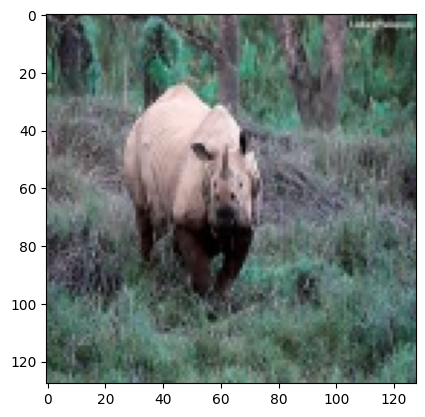

In [17]:
plt.imshow(df['image_matrix'][0])

In [19]:

x= df['image_matrix']
y= df['label']

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y= encoder.fit_transform(y.values.reshape(-1,1)).toarray()

## or
#y = pd.get_dummies(y)

## to be read by model
x = np.stack(x , axis=0)

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [32]:
y.shape

(4000, 4)

In [31]:
print(x_train.shape)
print(y_train.shape)

(3200, 128, 128, 3)
(3200, 4)


In [23]:
import random
def augment_dataset(images, labels, augment_count=None):
    """
    Augments a dataset by applying random transformations.

    Parameters:
        images (numpy.ndarray): The dataset as an array of images.
        labels (numpy.ndarray): The corresponding labels for the dataset.
        augment_count (int): Number of augmented images to generate per original image.
                             If None, it generates the same number of augmented images as the original dataset.

    Returns:
        tuple: Augmented images and labels as NumPy arrays.
    """
    if augment_count is None:
        augment_count = len(images)

    augmented_images = []
    augmented_labels = []
    original_shape = images[0].shape  # Ensure all images match the original shape

    def random_rotation(image):
        angle = random.uniform(-30, 30)  # Rotate between -30 and 30 degrees
        rows, cols = image.shape[:2]
        matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        return cv2.warpAffine(image, matrix, (cols, rows))

    def random_translation(image):
        rows, cols = image.shape[:2]
        tx = random.uniform(-0.2 * cols, 0.2 * cols)  # Translate up to 20% of image width
        ty = random.uniform(-0.2 * rows, 0.2 * rows)  # Translate up to 20% of image height
        matrix = np.float32([[1, 0, tx], [0, 1, ty]])
        return cv2.warpAffine(image, matrix, (cols, rows))

    def random_scaling(image):
        scale = random.uniform(0.8, 1.2)  # Scale between 80% and 120%
        rows, cols = image.shape[:2]
        scaled = cv2.resize(image, None, fx=scale, fy=scale)
        return cv2.resize(scaled, (cols, rows))  # Resize back to original shape

    def random_flip(image):
        flip_code = random.choice([-1, 0, 1])  # Randomly flip vertically, horizontally, or both
        return cv2.flip(image, flip_code)

    def random_brightness(image):
        value = random.uniform(0.7, 1.3)  # Adjust brightness by 70% to 130%
        image = cv2.convertScaleAbs(image, alpha=value, beta=0)
        return image

    def random_noise(image):
        noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, noise)
        return np.clip(noisy_image, 0, 255)

    # Apply augmentations
    for img, label in zip(images, labels):
        for _ in range(augment_count // len(images)):
            aug_img = img.copy()
            transformations = [
                random_rotation,
                random_translation,
                random_scaling,
                random_flip,
                random_brightness,
                random_noise
            ]
            random.shuffle(transformations)  # Shuffle the transformations
            for transform in transformations[:3]:  # Apply a random subset of transformations
                aug_img = transform(aug_img)
            aug_img = cv2.resize(aug_img, (original_shape[1], original_shape[0]))  # Ensure shape consistency
            augmented_images.append(aug_img)
            augmented_labels.append(label)  # Add the corresponding label

    return np.array(augmented_images), np.array(augmented_labels)

In [24]:
augmented_x_train, augmented_y_train = augment_dataset(x_train, y_train, augment_count=2 * len(x_train))

# Check the augmented dataset size
print(f"Original dataset size: {len(x_train)}")
print(f"Augmented dataset size: {len(augmented_x_train)}")
print(f"Original labels size: {len(y_train)}")
print(f"Augmented labels size: {len(augmented_y_train)}")

Original dataset size: 3200
Augmented dataset size: 6400
Original labels size: 3200
Augmented labels size: 6400


In [25]:
x_train.shape

(3200, 128, 128, 3)

In [26]:
augmented_x_train.shape

(6400, 128, 128, 3)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(augmented_x_train, augmented_y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2534 - loss: 194.3382 - val_accuracy: 0.2313 - val_loss: 1.3870
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2513 - loss: 1.3911 - val_accuracy: 0.2325 - val_loss: 1.3865
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2594 - loss: 1.6372 - val_accuracy: 0.2750 - val_loss: 1.3641
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3083 - loss: 1.3737 - val_accuracy: 0.3063 - val_loss: 1.3307
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3602 - loss: 1.3128 - val_accuracy: 0.3713 - val_loss: 1.3240
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4212 - loss: 1.2206 - val_accuracy: 0.3613 - val_loss: 1.2956
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5035 - loss: 1.1066 - val_accuracy: 0.3700 - val_loss: 1.4354
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5768 - loss: 0.9841 - val_ac

In [36]:
# Define a TensorFlow CNN for original data

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.3049 - loss: 419.1400 - val_accuracy: 0.4412 - val_loss: 1.2310
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6053 - loss: 1.0140 - val_accuracy: 0.6125 - val_loss: 1.0508
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8496 - loss: 0.4232 - val_accuracy: 0.6338 - val_loss: 1.0935
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9484 - loss: 0.1973 - val_accuracy: 0.6750 - val_loss: 1.4366
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9830 - loss: 0.0727 - val_accuracy: 0.6775 - val_loss: 1.5314


In [42]:
# Define a TensorFlow CNN for augmented data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(augmented_x_train, augmented_y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2561 - loss: 89.4379 - val_accuracy: 0.3050 - val_loss: 1.3653
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3335 - loss: 1.3503 - val_accuracy: 0.3587 - val_loss: 1.3100
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4267 - loss: 1.2498 - val_accuracy: 0.3812 - val_loss: 1.3978
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5160 - loss: 1.0823 - val_accuracy: 0.3713 - val_loss: 1.4956
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6374 - loss: 0.8774 - val_accuracy: 0.4025 - val_loss: 1.7498
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7391 - loss: 0.6618 - val_accuracy: 0.3462 - val_loss: 2.1094
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7837 - loss: 0.5784 - val_accuracy: 0.3500 - val_loss: 2.6964
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7939 - loss: 0.5211 - val_accuracy: 

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(augmented_x_train, augmented_y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2553 - loss: 74.0927 - val_accuracy: 0.2575 - val_loss: 1.3860
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2886 - loss: 1.3787 - val_accuracy: 0.2562 - val_loss: 1.3832
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3280 - loss: 1.3505 - val_accuracy: 0.2562 - val_loss: 1.3776
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3542 - loss: 1.3134 - val_accuracy: 0.2637 - val_loss: 1.3859
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4118 - loss: 1.2488 - val_accuracy: 0.3200 - val_loss: 1.3806
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4632 - loss: 1.1873 - val_accuracy: 0.3462 - val_loss: 1.5484
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5108 - loss: 1.1050 - val_accuracy: 0.3063 - val_loss: 1.6402
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5696 - loss: 0.9977 - val_acc